# Date Fruit Classification using YOLOv8 (Instance Segmentation)

Welcome to the **Date Fruit Classification Project** powered by YOLOv8 and Roboflow.

This notebook demonstrates how to train a **YOLOv8 instance segmentation model** to classify and segment the following Saudi date varieties:

---

## Class Labels
| Class ID | Class Name |
|----------|------------|
| 0        | Ajwa       |
| 1        | Medjool    |
| 2        | Sokari     |
| 3        | Sugaey     |




##  Model File

 Download the trained model and place it in the root as:
`date_fruit_model.pt`

[ Download from Google Drive](https://drive.google.com/file/d/1-tHzIK7pQUkJzNjdVsTYUydDsf7DIXoW/view?usp=sharing)

##  Data File

 Download the data and place it in the root as:
`dates_fruit_data`

[ Download from Google Drive](https://drive.google.com/drive/folders/1yw_4GmAsY2ZUyVHW510KkmagnxppgD3B?usp=sharing)

---
## Acknowledgment
- Abdulrahman almejna
- Khalid Alshahrani
- Ahmed Almutairi
- Saud Rawdhan

# Importing Libraries

In [ ]:
# Import libraries
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import glob
import os
import cv2
print(torch.cuda.is_available())
print(torch.cuda.device_count())


In [4]:
# Dataset YAML path
path = 'dates_fruit_data'  # change if needed
dataset_yml_path = path + '/data.yaml'    


Using dataset: /kaggle/input/dates111/data.yaml


# Commen setup

In [4]:
IMG_SIZE = 640
EPOCHS = 20
PATIENCE = 10
DEVICE = "0,1" 
PROJECT_DIR = "date_yolo_exp" 


# First model: YOLOv8s-seg

In [6]:
# Load small segmentation model with COCO pre-trained weights
model_s = YOLO('yolov8s-seg.pt')

## Fine Tuning


In [7]:
# Fine-tune YOLOv8s on our date dataset
results_s = model_s.train(
    data=dataset_yml_path,
    imgsz=640,
    epochs=20,
    patience=10,
    batch=16,
    device=DEVICE,
    project="date_yolo_exp",
    name="yolov8s_seg",
    cache=True,
    amp=True,
    workers=2
)

Ultralytics 8.3.237 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/dates111/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_seg, nbs=64, nms=False, opset=None, optim

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        322        322      0.986      0.982      0.993      0.993      0.986      0.982      0.993      0.993
                  Ajwa         70         70      0.998          1      0.995      0.995      0.998          1      0.995      0.994
               Medjool         28         28      0.948      0.964      0.989      0.989      0.948      0.964      0.989      0.989
                Sokari         48         48      0.996          1      0.995      0.995      0.996          1      0.995      0.995
                Sugaey        176        176          1      0.966      0.995      0.995          1      0.966      0.995      0.995
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /kaggle/working/date_yolo_exp/yolov8s_seg


## **Evaluating the Model**
We use **mAP@0.5:0.95** to assess performance.

In [3]:
# Validation on val split
model_s = YOLO('/Users/khalid/Downloads/bests.pt')
metrics_s_val = model_s.val(
    split="val",
    imgsz=IMG_SIZE,
    device=DEVICE
)

# Evaluation on test split
metrics_s_test = model_s.val(
    split="test",
    imgsz=IMG_SIZE,
    device=DEVICE
)

NameError: name 'IMG_SIZE' is not defined

# Second model: YOLOv8m-seg

In [9]:
# Load the model YOLOv8
model_m = YOLO("yolov8m-seg.pt")

## Fine Tuning


In [10]:
results_m = model_m.train(
    data=dataset_yml_path,
    imgsz=640,
    epochs=20,
    patience=10,
    batch=16,
    device=DEVICE,
    project="date_yolo_exp",
    name="yolov8m_seg",
    cache=True,
    amp=True,
    workers=2
)


Ultralytics 8.3.237 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/dates111/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m_seg, nbs=64, nms=False, opset=None, optim

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        322        322      0.938      0.956      0.993      0.993      0.938      0.956      0.993      0.993
                  Ajwa         70         70      0.999          1      0.995      0.995      0.999          1      0.995      0.995
               Medjool         28         28      0.753          1      0.989      0.989      0.753          1      0.989      0.989
                Sokari         48         48          1      0.963      0.995      0.995          1      0.963      0.995      0.995
                Sugaey        176        176          1      0.862      0.993      0.992          1      0.862      0.993      0.993
Speed: 0.1ms preprocess, 5.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /kaggle/working/date_yolo_exp/yolov8m_seg


## **Evaluating the Model**

In [11]:
model_m = YOLO("/Users/khalid/Downloads/bestm.pt")
metrics_m_val = model_m.val(
    split="val",
    imgsz=IMG_SIZE,
    device=DEVICE
)

metrics_m_test = model_m.val(
    split="test",
    imgsz=IMG_SIZE,
    device=DEVICE
)

Ultralytics 8.3.237 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,224,700 parameters, 0 gradients, 104.3 GFLOPs
val: Fast image access ✅ (ping: 1.2±0.2 ms, read: 43.1±4.2 MB/s, size: 16.1 KB)
val: Scanning /kaggle/input/dates111/valid/labels... 322 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 322/322 653.8it/s 0.5s0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/dates111/valid is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 2.2it/s 9.7s0.5s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        322        322      0.938      0.956      0.993      0.993      0.938      0.956      0.993      0.993
                  Ajwa         70         70      0.999          1      0.995      0.995      0.999          1      0.995      0.995
               Medjool         28         28      0.753          1      0.989      0.989      0.753          1      0.989      0.989
                Sokari         48         48          1      0.964      0.995      0.995          1      0.964      0.995      0.995
                Sugaey        176        176          1      0.861      0.993      0.992          1      0.861      0.993      0.993
Speed: 0.7ms preprocess, 22.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /kaggle/working/runs/segment/val3
Ultralytics 8.3.237 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 1.5

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        321        321      0.974      0.959      0.993      0.993      0.974      0.959      0.993      0.993
                  Ajwa         92         92      0.999          1      0.995      0.995      0.999          1      0.995      0.994
               Medjool         33         33      0.909          1      0.993      0.993      0.909          1      0.993      0.993
                Sokari         80         80      0.987      0.914      0.993      0.993      0.987      0.914      0.993      0.992
                Sugaey        116        116          1      0.922      0.992      0.992          1      0.922      0.992      0.992
Speed: 0.7ms preprocess, 23.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /kaggle/working/runs/segment/val4


##  Summary of metrics

In [14]:
print("=== Test set performance (Box mAP) ===")
print("YOLOv8s – mAP50:", metrics_s_test.box.map50, " mAP50-95:", metrics_s_test.box.map)
print("YOLOv8s – mean recall (mr):", metrics_s_test.box.mr, " mean precision (mp):", metrics_s_test.box.mp)
print("YOLOv8m – mAP50:", metrics_m_test.box.map50, " mAP50-95:", metrics_m_test.box.map)
print("YOLOv8m – mean recall (mr):", metrics_m_test.box.mr, " mean precision (mp):", metrics_m_test.box.mp)

print("\n=== Test set performance (Mask mAP) ===")
print("YOLOv8s – mAP50:", metrics_s_test.seg.map50, " mAP50-95:", metrics_s_test.seg.map)
print("YOLOv8s – mean recall (mr):", metrics_s_test.seg.mr, " mean precision (mp):", metrics_s_test.seg.mp)
print("YOLOv8m – mAP50:", metrics_m_test.seg.map50, " mAP50-95:", metrics_m_test.seg.map)
print("YOLOv8m – mean recall (mr):", metrics_m_test.seg.mr, " mean precision (mp):", metrics_m_test.seg.mp)


=== Test set performance (Box mAP) ===
YOLOv8s – mAP50: 0.9875335355664399  mAP50-95: 0.9858891597533959
YOLOv8s – mean recall (mr): 0.9693554774096248  mean precision (mp): 0.9608657675125616
YOLOv8m – mAP50: 0.9932713544270381  mAP50-95: 0.9932713544270382
YOLOv8m – mean recall (mr): 0.9591978823810423  mean precision (mp): 0.9735483381110819

=== Test set performance (Mask mAP) ===
YOLOv8s – mAP50: 0.9875335355664399  mAP50-95: 0.9874395100791835
YOLOv8s – mean recall (mr): 0.9693554774096248  mean precision (mp): 0.9608657675125616
YOLOv8m – mAP50: 0.9932713544270381  mAP50-95: 0.9926655380543821
YOLOv8m – mean recall (mr): 0.9591978823810423  mean precision (mp): 0.9735483381110819


# Predictions & visualization (using best model)

In [ ]:
# Choose the best-performing model
best_model = model_m

best_model.predict(
    source="/kaggle/input/predict",  # folder with images to test
    save=True,               
    save_txt=True,           
    save_conf=True,          
    imgsz=IMG_SIZE           
)

Using: /kaggle/working/runs/segment/predict


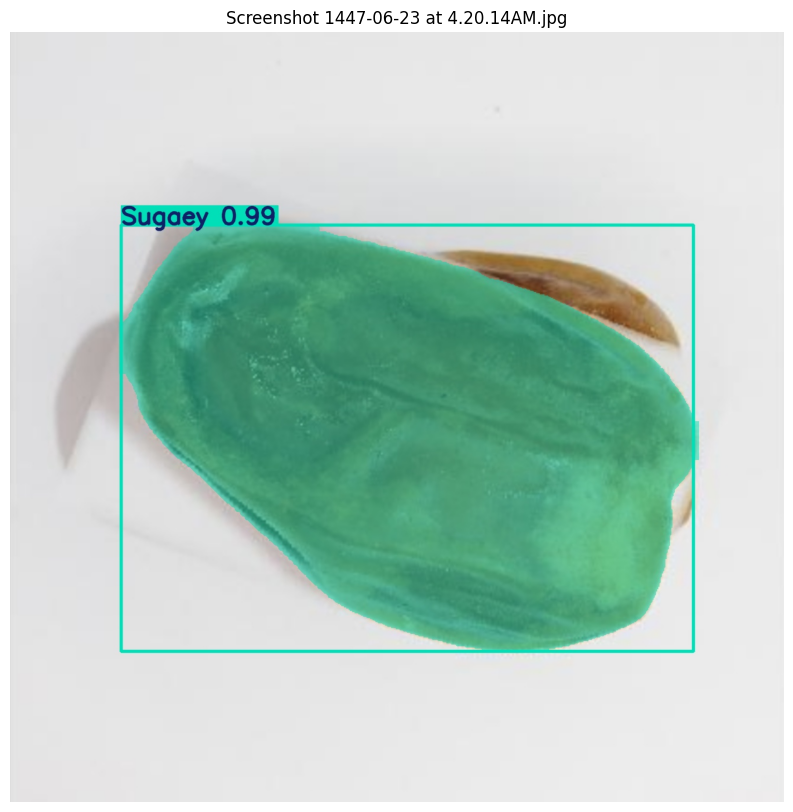

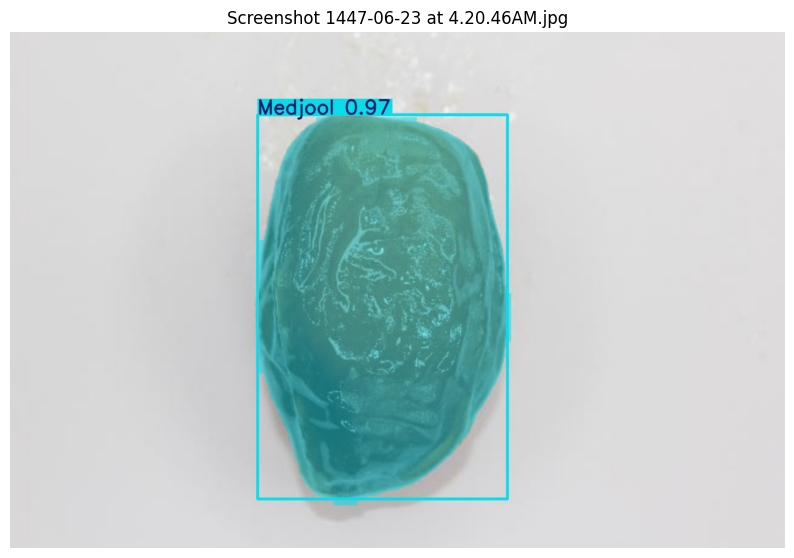

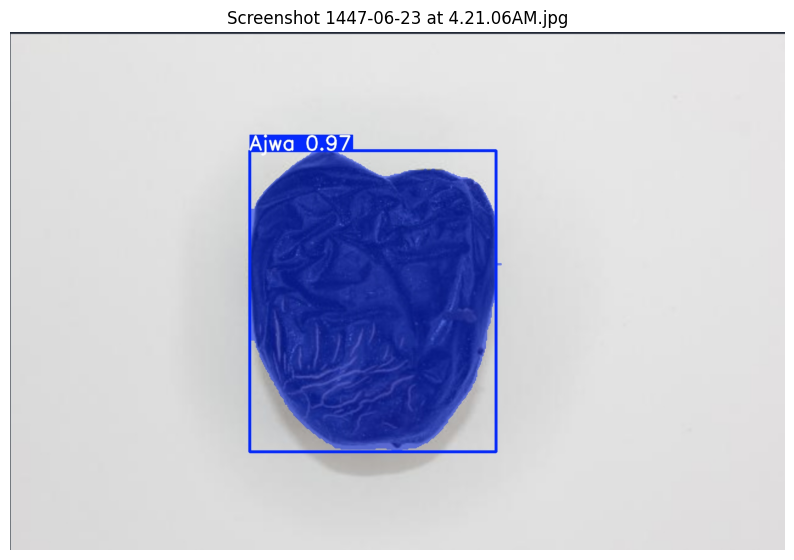

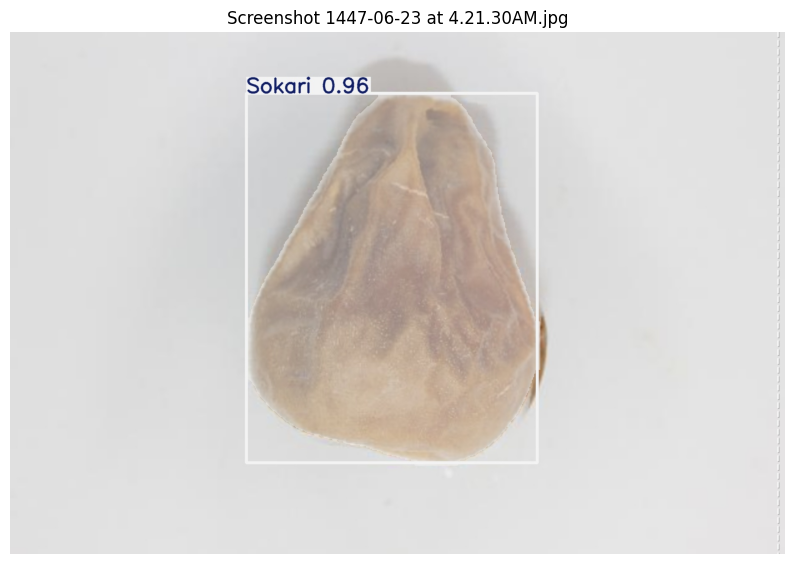

In [19]:
# Display all saved prediction images
all_images = glob.glob('/content/runs/segment/predict/*.jpg')

for image_path in all_images:
    img = plt.imread(image_path)   # read image
    plt.imshow(img)                # show image
    plt.axis('off')                # hide axes
    plt.title(os.path.basename(image_path))  # show file nameimport os, glob
import matplotlib.pyplot as plt

base = "/kaggle/working/runs/segment"

pred_dirs = sorted(glob.glob(os.path.join(base, "predict*")))

if not pred_dirs:
    print(f"No predict folders found under: {base}")
    print("Available folders under /kaggle/working:", os.listdir("/kaggle/working")[:50])
else:
    latest_dir = pred_dirs[-1]
    print("Using:", latest_dir)

    all_images = sorted(glob.glob(os.path.join(latest_dir, "*.jpg")) +
                        glob.glob(os.path.join(latest_dir, "*.png")))

    if not all_images:
        print("No .jpg/.png images found in", latest_dir)
    else:
        for p in all_images:
            img = plt.imread(p)
            plt.figure(figsize=(10, 10))
            plt.imshow(img)
            plt.axis("off")
            plt.title(os.path.basename(p))
            plt.show()

    plt.show()


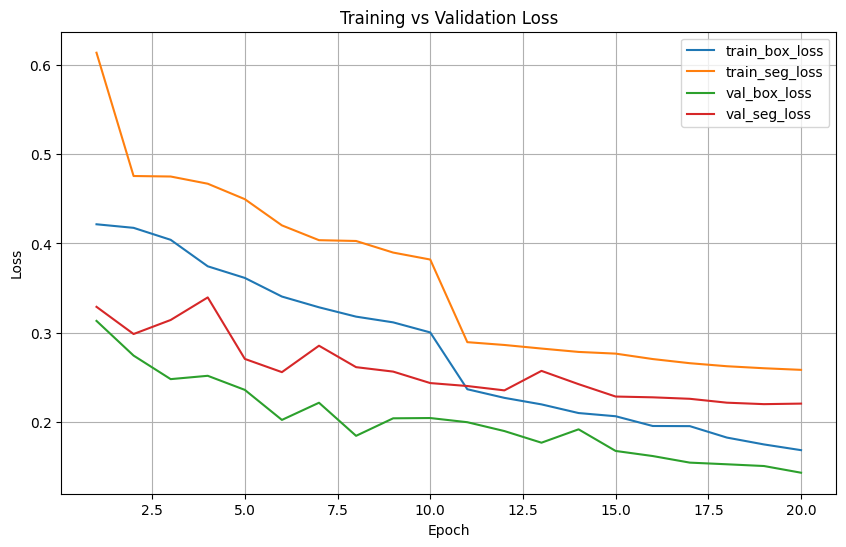

In [20]:
import pandas as pd
# 1. Load the training logs
# This path matches the one in your output text
path = '/kaggle/working/date_yolo_exp/yolov8m_seg/results.csv'

data = pd.read_csv(path)
data.columns = data.columns.str.strip()

    # 2. Setup the plot
plt.figure(figsize=(10, 6))
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

    # 3. Plot the specific curves you wanted
plt.plot(data['epoch'], data['train/box_loss'], label='train_box_loss')
plt.plot(data['epoch'], data['train/seg_loss'], label='train_seg_loss')
plt.plot(data['epoch'], data['val/box_loss'], label='val_box_loss')
plt.plot(data['epoch'], data['val/seg_loss'], label='val_seg_loss')

plt.legend()
plt.show()
